In [ ]:
# import packages
import numpy as np
import pandas as pd
import os
import datetime as dt
import stat
from scipy.stats import pointbiserialr
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import seaborn as sns
import re


#for text processing
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import wordnet
nltk.download('wordnet')
import string
nltk.download('words')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [ ]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
id = '1tkry63EvDXY_CPSfDomBoa8IbUXZN-2y'

In [ ]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('train-balanced-sarcasm.csv')  
df = pd.read_csv('train-balanced-sarcasm.csv')
# Dataset is now stored in a Pandas Dataframe

In [ ]:
df.head()

,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment
0,0,NC and NH.,Trumpbart,politics,2,-1,-1,2016-10,2016-10-16 23:55:23,"Yeah, I get that argument. At this point, I'd ..."
1,0,You do know west teams play against west teams...,Shbshb906,nba,-4,-1,-1,2016-11,2016-11-01 00:24:10,The blazers and Mavericks (The wests 5 and 6 s...
2,0,"They were underdogs earlier today, but since G...",Creepeth,nfl,3,3,0,2016-09,2016-09-22 21:45:37,They're favored to win.
3,0,"This meme isn't funny none of the ""new york ni...",icebrotha,BlackPeopleTwitter,-8,-1,-1,2016-10,2016-10-18 21:03:47,deadass don't kill my buzz
4,0,I could use one of those tools.,cush2push,MaddenUltimateTeam,6,-1,-1,2016-12,2016-12-30 17:00:13,Yep can confirm I saw the tool they use for th...


In [ ]:
df.created_utc = pd.to_datetime(df.created_utc)
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010826 entries, 0 to 1010825
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   label           1010826 non-null  int64         
 1   comment         1010773 non-null  object        
 2   author          1010826 non-null  object        
 3   subreddit       1010826 non-null  object        
 4   score           1010826 non-null  int64         
 5   ups             1010826 non-null  int64         
 6   downs           1010826 non-null  int64         
 7   date            1010826 non-null  object        
 8   created_utc     1010826 non-null  datetime64[ns]
 9   parent_comment  1010826 non-null  object        
dtypes: datetime64[ns](1), int64(4), object(5)
memory usage: 77.1+ MB


# Missing comments

In [ ]:
print(len(df["comment"]==True))
df[pd.isna(df["comment"])==True].head()

1010826


,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment
56269,1,NaN,SodokuIRL,leagueoflegends,1,1,0,2016-09,2016-09-28 08:23:04,"LPL shitshow, EU LCS shitshow. What isn't a sh..."
68590,1,NaN,TossTheDog,westchesterpa,1,-1,-1,2016-10,2016-10-11 20:25:52,Car fires smell delicious to you? You should p...
135348,0,NaN,So12rovv,R6STeams,1,-1,-1,2016-12,2016-12-22 17:24:05,Will do. EU or NA?
199910,0,NaN,Khvostov_7g-02,tf2,1,1,0,2016-05,2016-05-16 05:46:43,"woah, thanks."
258718,1,NaN,PeaceLovePositivity,vaporents,5,5,0,2016-06,2016-06-22 20:37:11,"No, doing drugs while forming a fetus (your ki..."


# Check if there are duplicated rows

In [ ]:
sum(df.duplicated(keep=False)) 

53

There are 53 duplicated rows!

In [ ]:
wdwdf[df.duplicated(keep=False)]

,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment
851,1,Said the under 2k post karma guy *expert*,iam4real,youdontsurf,1,-1,-1,2016-11,2016-11-02 10:09:10,This subreddit really does suck.
23777,1,Said the under 2k post karma guy *expert*,iam4real,youdontsurf,1,-1,-1,2016-11,2016-11-02 10:09:10,This subreddit really does suck.
66727,1,"USE REAL WORDS, DAMN IT",FlameSpartan,TumblrInAction,1,1,0,2016-09,2016-09-07 00:31:39,"Yo, that's such a kawai'i level of desu, it ma..."
78313,1,"USE REAL WORDS, DAMN IT",FlameSpartan,TumblrInAction,1,1,0,2016-09,2016-09-07 00:31:39,"Yo, that's such a kawai'i level of desu, it ma..."
125805,1,Hey you're that one guy who racked in all that...,OG_Phx_Son,pcmasterrace,1,-1,-1,2016-10,2016-10-02 15:56:40,Practice mowing lawns pls
160906,1,Hey you're that one guy who racked in all that...,OG_Phx_Son,pcmasterrace,1,-1,-1,2016-10,2016-10-02 15:56:40,Practice mowing lawns pls
185564,1,Well this sub went from 64k to 94k last week s...,TheSergeantWinter,battlefield_one,1,-1,-1,2016-10,2016-10-31 12:05:49,"Define ""a lot"", and then tell me how you can j..."
190948,1,"Because Sandy Hook, CT and Aurora, CO were so ...",Gogomelo,news,-9,-9,0,2016-07,2016-07-31 11:59:53,"Just stay out of ghetto neighborhoods, violent..."
198234,1,Unless your neighbour's face is hidden under a...,deadcat,australia,1,1,0,2016-07,2016-07-04 21:45:37,It's much easier to blindly hate a faceless id...
201633,1,"Because Sandy Hook, CT and Aurora, CO were so ...",Gogomelo,news,-9,-9,0,2016-07,2016-07-31 11:59:53,"Just stay out of ghetto neighborhoods, violent..."


In [ ]:
df[df.duplicated(keep=False)].head()

,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment
851,1,Said the under 2k post karma guy *expert*,iam4real,youdontsurf,1,-1,-1,2016-11,2016-11-02 10:09:10,This subreddit really does suck.
23777,1,Said the under 2k post karma guy *expert*,iam4real,youdontsurf,1,-1,-1,2016-11,2016-11-02 10:09:10,This subreddit really does suck.
66727,1,"USE REAL WORDS, DAMN IT",FlameSpartan,TumblrInAction,1,1,0,2016-09,2016-09-07 00:31:39,"Yo, that's such a kawai'i level of desu, it ma..."
78313,1,"USE REAL WORDS, DAMN IT",FlameSpartan,TumblrInAction,1,1,0,2016-09,2016-09-07 00:31:39,"Yo, that's such a kawai'i level of desu, it ma..."
125805,1,Hey you're that one guy who racked in all that...,OG_Phx_Son,pcmasterrace,1,-1,-1,2016-10,2016-10-02 15:56:40,Practice mowing lawns pls


In [ ]:
df[df.duplicated(subset=['comment','author','subreddit','parent_comment'])]

,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment
10185,1,Shocking,Clyde_Died,todayilearned,2,2,0,2016-09,2016-09-29 17:53:07,TIL materials needed to produce a pair of $199...
12357,1,Said the under 2k post karma guy *expert*,iam4real,youdontsurf,0,-1,-1,2016-11,2016-11-02 10:09:10,This subreddit really does suck.
15649,1,I am very surprised that there is more than 1 ...,PianoRainMelody,ClashRoyale,4,-1,-1,2016-12,2016-12-30 22:47:58,CONGRATS! YOU ARE AN INSPIRATION!
23777,1,Said the under 2k post karma guy *expert*,iam4real,youdontsurf,1,-1,-1,2016-11,2016-11-02 10:09:10,This subreddit really does suck.
40133,0,F,Leoleomeomeo,The_Donald,6,-1,-1,2016-12,2016-12-08 01:23:58,F
...,...,...,...,...,...,...,...,...,...,...
1008663,0,OK,db2,atheism,1,1,0,2011-03,2011-03-08 02:21:40,STOP YELLING
1009033,1,"He is going to go to each state, be elected ki...",cheney_healthcare,politics,3,3,0,2011-01,2011-01-27 13:49:57,What?
1009401,1,"Yea, it's rare that you turn on the news and s...",haiduz,IAmA,5,5,0,2011-07,2011-07-27 21:23:41,"Really, CNN could use any publicity it could g..."
1010325,1,"Probably not without our hero, Sara Palin, bei...",sirjoebob,pics,5,5,0,2009-08,2009-08-17 15:58:06,When can we start hunting them from helicopters?


There are 256 rows with duplicated comments


In [ ]:
df = df.drop_duplicates(subset=['comment','author','subreddit','parent_comment'],keep='last')
df

,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment
0,0,NC and NH.,Trumpbart,politics,2,-1,-1,2016-10,2016-10-16 23:55:23,"Yeah, I get that argument. At this point, I'd ..."
1,0,You do know west teams play against west teams...,Shbshb906,nba,-4,-1,-1,2016-11,2016-11-01 00:24:10,The blazers and Mavericks (The wests 5 and 6 s...
2,0,"They were underdogs earlier today, but since G...",Creepeth,nfl,3,3,0,2016-09,2016-09-22 21:45:37,They're favored to win.
3,0,"This meme isn't funny none of the ""new york ni...",icebrotha,BlackPeopleTwitter,-8,-1,-1,2016-10,2016-10-18 21:03:47,deadass don't kill my buzz
4,0,I could use one of those tools.,cush2push,MaddenUltimateTeam,6,-1,-1,2016-12,2016-12-30 17:00:13,Yep can confirm I saw the tool they use for th...
...,...,...,...,...,...,...,...,...,...,...
1010821,1,I'm sure that Iran and N. Korea have the techn...,TwarkMain,reddit.com,2,2,0,2009-04,2009-04-25 00:47:52,"No one is calling this an engineered pathogen,..."
1010822,1,"whatever you do, don't vote green!",BCHarvey,climate,1,1,0,2009-05,2009-05-14 22:27:40,In a move typical of their recent do-nothing a...
1010823,1,Perhaps this is an atheist conspiracy to make ...,rebelcommander,atheism,1,1,0,2009-01,2009-01-11 00:22:57,Screw the Disabled--I've got to get to Church ...
1010824,1,The Slavs got their own country - it is called...,catsi,worldnews,1,1,0,2009-01,2009-01-23 21:12:49,I've always been unsettled by that. I hear a l...


We are left with 1010570 rows.

# Comments == Parent comments analysis


In [ ]:
sum(pd.isna(df["parent_comment"])) ## no parent comment is missing

0

No parent comment is missing


In [ ]:
op_comment = df[df["comment"]==df["parent_comment"]]
len(op_comment) #546

546

In [ ]:
len(op_comment["author"].unique())

540

In [ ]:
op_comment[op_comment.duplicated("author",keep=False)]

,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment
163012,0,Cat.,george_s_4,CatsStandingUp,6,-1,-1,2016-10,2016-10-28 16:20:19,Cat.
175008,0,Cat.,nPrimo,CatsStandingUp,5,-1,-1,2016-11,2016-11-25 21:45:47,Cat.
175009,0,Kitty.,nPrimo,kitty,1,-1,-1,2016-10,2016-10-31 02:43:53,Kitty.
219920,0,cat.,roastsGently,catssittingdown,1,1,0,2016-07,2016-07-09 22:03:33,cat.
240839,0,Cat.,roastsGently,CatsStandingUp,7,7,0,2016-07,2016-07-16 18:14:36,Cat.
271397,0,Cat.,george_s_4,aww,-3,-3,0,2016-07,2016-07-29 15:47:36,Cat.
363851,0,Kitty.,saphirayne,kitty,3,3,0,2016-04,2016-04-03 15:06:09,Kitty.
618387,0,Cat.,saphirayne,CatsStandingUp,3,3,0,2015-08,2015-08-01 08:16:02,Cat.
796799,0,?,AdmiralAkbar1,AdviceAnimals,30,30,0,2014-06,2014-06-19 12:21:36,?
861837,0,I am Groot.,AdmiralAkbar1,AskReddit,1,1,0,2014-09,2014-09-01 22:57:19,I am Groot.


6 authors in op_comment seems to like to post cat


In [ ]:
op_comment[op_comment.duplicated("comment",keep=False)]

,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment
3205,0,Sleep tight Tucker,Smithy7777,The_Donald,2,-1,-1,2016-11,2016-11-23 05:37:23,Sleep tight Tucker
4332,0,F,notDarksta,2007scape,1,-1,-1,2016-11,2016-11-15 22:12:11,F
4532,0,Kitty.,wawa09,kitty,6,-1,-1,2016-10,2016-10-05 17:25:16,Kitty.
5411,0,Cat.,UncleSweaty,aww,5,-1,-1,2016-11,2016-11-24 15:20:59,Cat.
5839,0,Cat.,cat_with_a_fez,CatsStandingUp,10,-1,-1,2016-11,2016-11-29 15:55:06,Cat.
...,...,...,...,...,...,...,...,...,...,...
886561,0,Cat.,vkashen,CatsStandingUp,4,4,0,2014-05,2014-05-30 00:45:03,Cat.
892066,0,added,nagrom7,friendsafari,1,1,0,2014-07,2014-07-17 13:49:41,added
915613,0,Tom Cruise,imgregharrison,AskReddit,1,1,0,2012-10,2012-10-18 23:40:03,Tom Cruise
916238,0,Cat.,bicolorskydiver,CatsStandingUp,7,7,0,2013-12,2013-12-03 02:20:26,Cat.


279 comments (about half) are repeated in these op_comments, provided by different authors and in different subreddits. Perhaps we should remove these.


# Are there sarcasm-only authors?

In [ ]:
author_df = df.groupby("author").label.mean().reset_index().rename(columns={'label':'ratio'})

In [ ]:
author_df

,author,ratio
0,---,0.5
1,--------__--------,0.5
2,------___--___------,0.5
3,-----BroAway-----,0.5
4,----_____----,0.5
...,...,...
256556,zzztyu,0.5
256557,zzzxxc1,0.5
256558,zzzzz94,0.5
256559,zzzzzzzzzzzzzzdz,0.5


In [ ]:
df[df["author"]=='-Anguscr4p-']	

,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment
307501,0,This just makes me want a 3DS 2.5D Metroid eve...,-Anguscr4p-,Metroid,1,1,0,2016-08,2016-08-12 15:54:57,3D Metroid FullHD/60Fps gameplay in 3DNes emul...
939191,0,Holy crap someone else says brotato!,-Anguscr4p-,nfl,13,13,0,2013-07,2013-07-02 21:13:45,"Just you wait, brotato. We're earning those go..."
972154,1,*obviously*,-Anguscr4p-,nfl,1,1,0,2013-02,2013-02-24 19:46:46,so Flacco's the best QB ?


In [ ]:
author_df[author_df["ratio"]!=0.5]

,author,ratio
40,--o,0.473684
51,-311-,1.000000
74,-Anguscr4p-,0.333333
198,-InterestingTimes-,1.000000
255,-Miss-Ann-Thrope-,1.000000
...,...,...
256425,zulugolftangovictor,1.000000
256448,zuzutmc,1.000000
256505,zymurgistical,1.000000
256507,zynthesis,0.428571


In [ ]:
len(author_df[author_df["ratio"]!=0.5])

4867

In [ ]:
4867/256561

0.01897014745031396

Only 0.02% of authors have non 0.5 ratio of sarcasm vs number of comments

In [ ]:
author_df[author_df["ratio"]!=0.5]["ratio"].describe()

count    4867.000000
mean        0.674723
std         0.319322
min         0.000000
25%         0.400000
50%         0.486486
75%         1.000000
max         1.000000
Name: ratio, dtype: float64

In [ ]:
author_df2 = df.groupby('author').count()

In [ ]:
author_df2.comment.describe()

count    256561.000000
mean          3.938701
std           6.052870
min           0.000000
25%           2.000000
50%           2.000000
75%           4.000000
max         845.000000
Name: comment, dtype: float64

Mean of comments from a single author is about 4. Perhaps if we don't consider the single time comments the ratio will be 0. And there is a single author with 845 comments, so median might be better to use than mean.

In [ ]:
author_list = author_df2[author_df2["comment"]>=2].index

In [ ]:
author_df3 = df[df['author'].isin(author_list)]
author_df3 = author_df3.groupby("author").label.mean().reset_index().rename(columns={'label':'ratio'})
author_df3[author_df3["ratio"]!=0.5]["ratio"].describe()

count    2441.000000
mean        0.409617
std         0.086625
min         0.000000
25%         0.333333
50%         0.400000
75%         0.454545
max         1.000000
Name: ratio, dtype: float64

In [ ]:
2441/256561 

0.009514306539185613

Even after filtering comments>2, only 0.01 percent of authors have ratio!=0.5. We can conclude author is quite useless in detecting sarcasm.



#  Check on outlier authors


In [ ]:
author_list2 = author_df2[author_df2["comment"]>=(3.93+2*6.05)].index ## not sure 2 standard deviation is reasonable

In [ ]:
outlier_author = df[df['author'].isin(author_list2)]
outlier_author

,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment
5,0,"I don't pay attention to her, but as long as s...",only7inches,AskReddit,0,0,0,2016-09,2016-09-02 10:35:08,do you find ariana grande sexy ?
6,0,Trick or treating in general is just weird...,only7inches,AskReddit,1,-1,-1,2016-10,2016-10-23 21:43:03,What's your weird or unsettling Trick or Treat...
8,0,"You don't have to, you have a good build, buy ...",SoupToPots,pcmasterrace,1,-1,-1,2016-10,2016-10-27 19:11:06,What to upgrade? I have $500 to spend (mainly ...
12,0,They have an agenda.,Readbooks6,exmormon,4,-1,-1,2016-10,2016-10-15 01:14:03,There's no time to worry about leaks when they...
13,0,Great idea!,pieman2005,fantasyfootball,1,-1,-1,2016-10,2016-10-06 23:27:53,Team Specific Threads No matter how many artic...
...,...,...,...,...,...,...,...,...,...,...
1010695,1,See what socialized medicine forces people to do.,plbogen,gadgets,0,0,0,2009-08,2009-08-17 01:46:24,the satellite was used for the dramatic 1999 b...
1010742,1,That was a very thorough analysis of the article.,luster,business,2,2,0,2009-05,2009-05-28 15:40:49,Bullshit.
1010775,1,"Making it a Bad Thing, by definition.",graphictruth,pics,1,1,0,2009-09,2009-09-10 23:26:46,"If no one is aware, multi culturalism is solel..."
1010811,1,Thank you unions.,boot20,politics,2,2,0,2009-05,2009-05-28 05:18:11,No wonder California is broke - The $350K Nurs...


In [ ]:
outlier_author2 = outlier_author.groupby("author").label.mean().reset_index().rename(columns={'label':'ratio'})

In [ ]:
outlier_author2

,author,ratio
0,--------__--------,0.500000
1,---Earth---,0.500000
2,--TaCo--,0.500000
3,--o,0.473684
4,-Deadzone-,0.500000
...,...,...
5645,zwiebelsaft,0.500000
5646,zwind,0.500000
5647,zxcvb94105,0.500000
5648,zzMojaveExpress,0.500000


There are 5650 outlier authors


In [ ]:
outlier_author2.ratio.describe()

count    5650.000000
mean        0.498793
std         0.007318
min         0.095238
25%         0.500000
50%         0.500000
75%         0.500000
max         0.521739
Name: ratio, dtype: float64

As expected, even among outlier authors, the ratio of sarcasm is also about 0.5.


## Balanced dataset

In [ ]:
sum(df["label"]==1) #505171
sum(df["label"]==0) #505399 

505399

Dataset is slightly skewed



## Relationship between Label & Numerical Variable

In [ ]:
import math
df["net_votes"] = df["ups"] + df["downs"]
df["new_ratio"] = (abs(df['ups'])+1)/(abs(df['downs'])+1)

In [ ]:
df["new_ratio"]

0          1.0
1          1.0
2          4.0
3          1.0
4          1.0
          ... 
1010821    3.0
1010822    2.0
1010823    2.0
1010824    2.0
1010825    3.0
Name: new_ratio, Length: 1010570, dtype: float64

In [ ]:
df.head()

,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment,net_votes,new_ratio
0,0,NC and NH.,Trumpbart,politics,2,-1,-1,2016-10,2016-10-16 23:55:23,"Yeah, I get that argument. At this point, I'd ...",-2,1.0
1,0,You do know west teams play against west teams...,Shbshb906,nba,-4,-1,-1,2016-11,2016-11-01 00:24:10,The blazers and Mavericks (The wests 5 and 6 s...,-2,1.0
2,0,"They were underdogs earlier today, but since G...",Creepeth,nfl,3,3,0,2016-09,2016-09-22 21:45:37,They're favored to win.,3,4.0
3,0,"This meme isn't funny none of the ""new york ni...",icebrotha,BlackPeopleTwitter,-8,-1,-1,2016-10,2016-10-18 21:03:47,deadass don't kill my buzz,-2,1.0
4,0,I could use one of those tools.,cush2push,MaddenUltimateTeam,6,-1,-1,2016-12,2016-12-30 17:00:13,Yep can confirm I saw the tool they use for th...,-2,1.0


In [ ]:
# creating a table of biserial correlation between label and numerical

num_data = df[['score', 'ups','downs','net_votes','new_ratio']]
corr_list = []
y = df['label'].astype(float)

for column in num_data:
    x = num_data[column]
    corr = pointbiserialr(list(x), list(y))
    corr_list.append(corr[0])

print(corr_list)

[-0.010001924870522882, -0.006671373956508205, 0.05758103164324234, -0.006175346676670784, -0.002017980795963008]


Sarcasm doesnt seem to have any relationship with scores and votes



## Relationship between numerical variables


Text(0.5, 1.0, 'Correlation Heatmap')

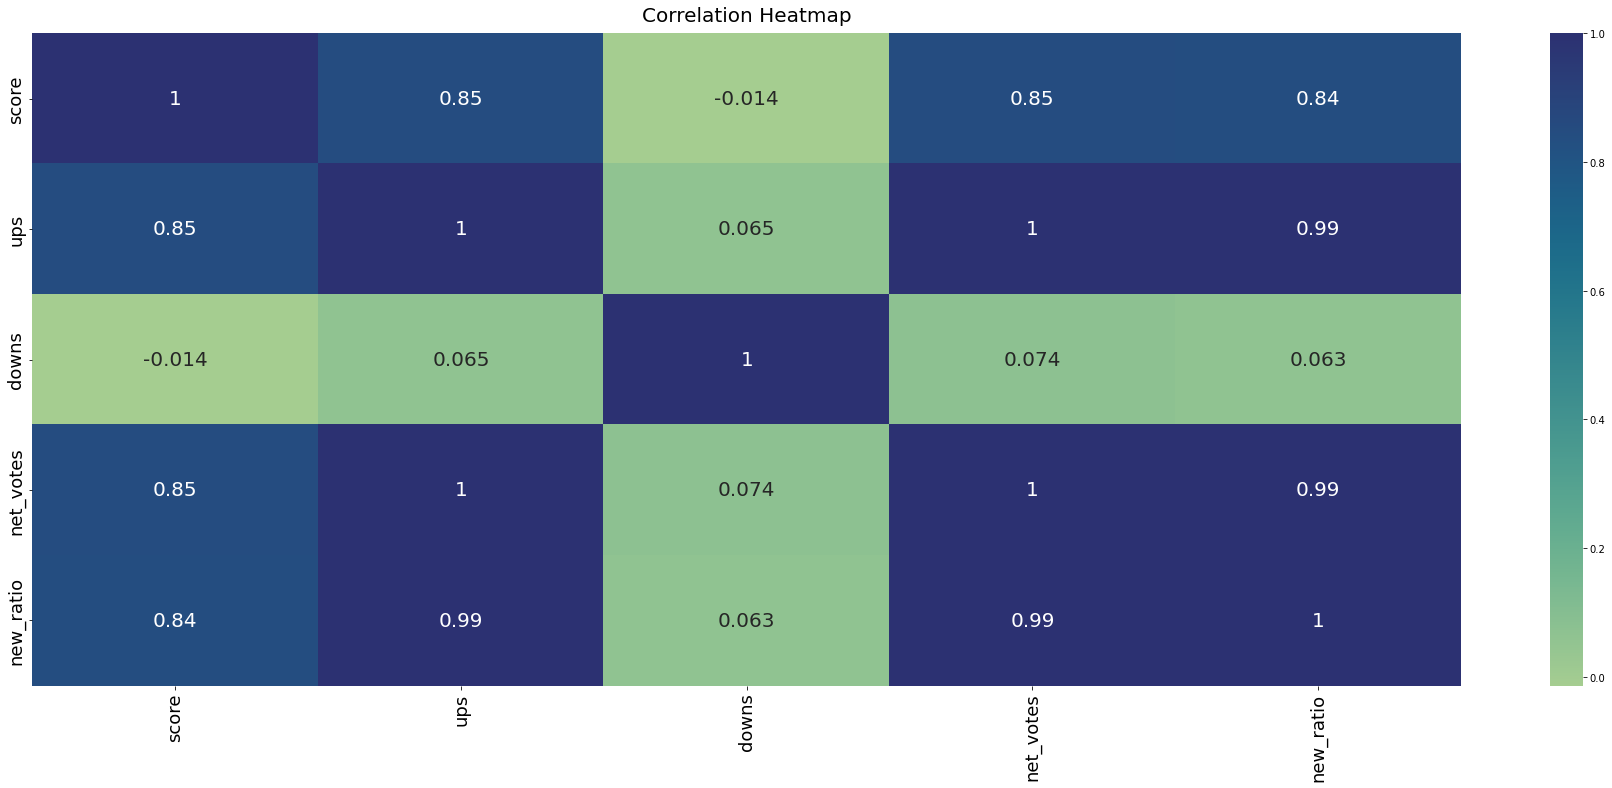

In [ ]:
plt.figure(figsize=(32,12))
corrMatrix = num_data.corr()

heatmap = sns.heatmap(corrMatrix, annot=True, annot_kws={"size": 20}, cmap="crest")
heatmap.set_xticklabels(heatmap.get_xmajorticklabels(), fontsize = 18, rotation=90)
heatmap.set_yticklabels(heatmap.get_ymajorticklabels(), fontsize = 18)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':20}, pad=12)

In [ ]:
#we can drop the column with high correlation
df = df.drop(columns=['ups','net_votes'], axis = 1)

## Boxplot relationship between Numerical Variables

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


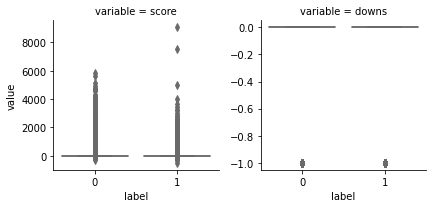

In [ ]:
cols = ['score','downs']
temp = df[cols]
temp = df.melt(id_vars=['label'])
grid = sns.axisgrid.FacetGrid(temp[temp.variable.isin(cols)], col='variable', sharey=False, col_wrap=3)
grid.map(sns.boxplot, 'label','value', palette="Set3")

Labels have seem to have a slightly different relationship with score, but not for downs


## Which subreedit has most sarcasm?

In [ ]:
def c_ratio(df):
  no_sarcasm = sum(df["label"]==0)
  sarcasm = sum(df["label"]==1)
  return sarcasm/(sarcasm + no_sarcasm)
sub_df = df.groupby("subreddit").apply(c_ratio).reset_index(name='ratio')

In [ ]:
sub_df2 = sub_df.sort_values(by=['ratio'],ascending=False)
sub_df2

,subreddit,ratio
3269,HighEndStreetwear,1.0
11411,liveaboard,1.0
3311,HomeDecorating,1.0
8525,bayareagraffiti,1.0
3321,Homeshake,1.0
...,...,...
6878,Tgifs,0.0
6873,TexasCHL,0.0
6866,TerrariaExchange,0.0
6864,TerrainBuilding,0.0


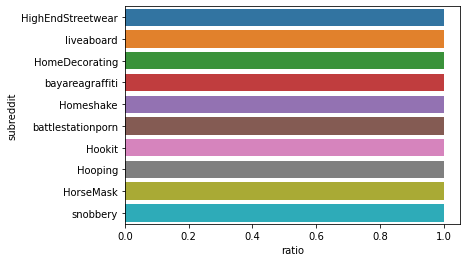

In [ ]:
sns.barplot(data=sub_df2.iloc[0:10,], y="subreddit", x='ratio')

In [ ]:
for i in sub_df2.iloc[0:10,]["subreddit"]:
  print(sum(df["subreddit"]==i))  ## Majority of these subreddit have only 1 comment, thus ratio=1

1
1
1
1
1
1
5
1
1
1


In [ ]:
np.mean(df.groupby("subreddit").apply(len).reset_index(name='count')) # mean of subreddit counts

count    67.92378
dtype: float64

In [ ]:
sub_df3 = df.groupby("subreddit").apply(len).reset_index(name='count')
sub_df3

,subreddit,count
0,07Scape,1
1,0x10c,2
2,0x3642,1
3,100DaysofKeto,3
4,100pushups,1
...,...,...
14873,zoophilia,1
14874,zootopia,75
14875,zweiteliga,1
14876,zyramains,5


In [ ]:
sub_df3 = sub_df3[sub_df3["count"]>=68]

In [ ]:
subs = sub_df3["subreddit"]
sub_df3 = df[df["subreddit"].isin(subs)]

In [ ]:
len(sub_df3)

921328

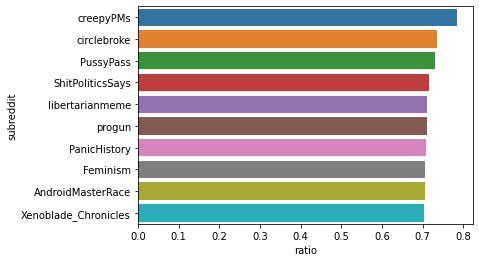

In [ ]:
sub_df3 = sub_df3.groupby("subreddit").apply(c_ratio).reset_index(name='ratio')
sub_df3 = sub_df3.sort_values(by=['ratio'],ascending=False)
sns.barplot(data=sub_df3.iloc[0:10,], y="subreddit", x='ratio')
## reasonable result after filtering subreddits that have > 68 comments

plot of subreddits topics that have high sarcastic comment: total comment ratio and have more than 68 comments per subreddit

## Length of comment and sarcasm

In [ ]:
sarcasm = df[df["label"]==1]
non_sarcasm = df[df["label"]==0]

In [ ]:
def word_count(df):
  return len(df["comment"])
sarcasm["word_count"] = sarcasm['comment'].str.split().str.len()
non_sarcasm["word_count"] = non_sarcasm['comment'].str.split().str.len()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
non_sarcasm.head()

,label,comment,author,subreddit,score,downs,date,created_utc,parent_comment,new_ratio,word_count
0,0,NC and NH.,Trumpbart,politics,2,-1,2016-10,2016-10-16 23:55:23,"Yeah, I get that argument. At this point, I'd ...",1.0,3.0
1,0,You do know west teams play against west teams...,Shbshb906,nba,-4,-1,2016-11,2016-11-01 00:24:10,The blazers and Mavericks (The wests 5 and 6 s...,1.0,14.0
2,0,"They were underdogs earlier today, but since G...",Creepeth,nfl,3,0,2016-09,2016-09-22 21:45:37,They're favored to win.,4.0,19.0
3,0,"This meme isn't funny none of the ""new york ni...",icebrotha,BlackPeopleTwitter,-8,-1,2016-10,2016-10-18 21:03:47,deadass don't kill my buzz,1.0,12.0
4,0,I could use one of those tools.,cush2push,MaddenUltimateTeam,6,-1,2016-12,2016-12-30 17:00:13,Yep can confirm I saw the tool they use for th...,1.0,7.0


Text(0.5, 1.0, 'Non Sarcasm comments word count')

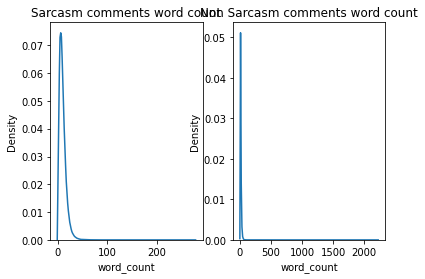

In [ ]:
plt.subplot(1,2,1)
sns.kdeplot(data=sarcasm,x='word_count')
plt.title("Sarcasm comments word count")

plt.subplot(1,2,2)
sns.kdeplot(data=non_sarcasm,x='word_count')
plt.title("Non Sarcasm comments word count")  ## need to filter exceptionally great word count


Text(0.5, 1.0, 'Non Sarcasm comments word count')

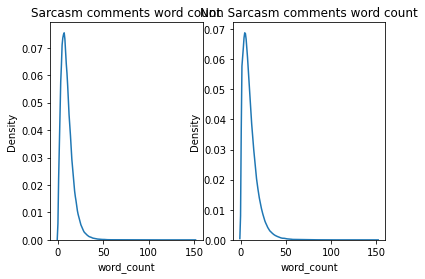

In [ ]:
## Since comments are generally short, we'll try to filter word_count<150
non_sarcasm2 = non_sarcasm[non_sarcasm["word_count"]<=150]
sarcasm2 = sarcasm[sarcasm["word_count"]<=150]

plt.subplot(1,2,1)
sns.kdeplot(data=sarcasm2,x='word_count')
plt.title("Sarcasm comments word count")

plt.subplot(1,2,2)
sns.kdeplot(data=non_sarcasm2,x='word_count')
plt.title("Non Sarcasm comments word count")   

Word count actually seems to have the same distribution between sarcasm and non sarcasm comments.

## Punctuations and sarcasm


In [ ]:
sarcasm['punctuation_count'] = sarcasm['comment'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))
non_sarcasm['punctuation_count'] = non_sarcasm['comment'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


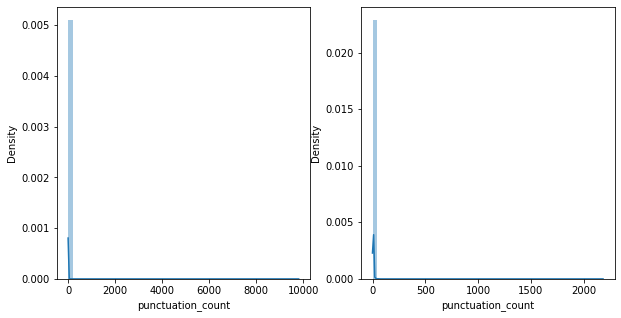

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
sns.distplot(sarcasm["punctuation_count"], ax=ax1)
sns.distplot(non_sarcasm["punctuation_count"], ax=ax2)       
# need to filter away extreme punctuation in sarcasm comments

In [ ]:
sarcasm[sarcasm["punctuation_count"]>500]
sarcasm_less = sarcasm[sarcasm["punctuation_count"]<=500]
## there is only 1 sarcasm comment with >500 punctuations

non_sarcasm[non_sarcasm["punctuation_count"]>500]
non_sarcasm_less = non_sarcasm[non_sarcasm["punctuation_count"]<=500]
## there is only 1 non_sarcasm comment with >500 punctuations


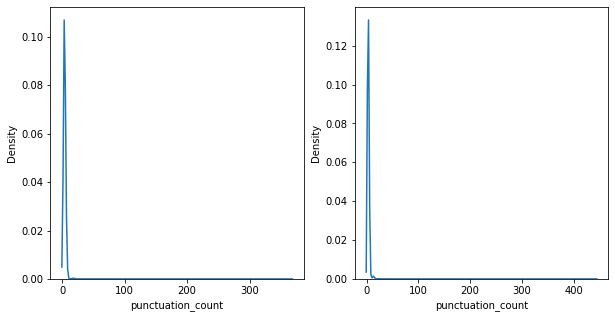

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
sns.kdeplot(sarcasm_less["punctuation_count"], ax=ax1)
sns.kdeplot(non_sarcasm_less["punctuation_count"], ax=ax2)       

The punctuations count seem to be quite similar between sarcasm and non sarcasm comments. Perhaps punctuations are not important



# Check for air quotes

In [ ]:
comment = sarcasm.iloc[1, sarcasm.columns.get_loc('comment')]
comment

'wow it is totally unreasonable to assume that the agency that covered up Bush war crimes because "muh republican party" would be partisan as fuck'

In [ ]:
re.findall('"([^"]*)"', comment)

['muh republican party']

In [ ]:
df['comment']=df['comment'].apply(str)
quotation_mark = []
for i in range(0,1010570):
  comment = df.iloc[i, df.columns.get_loc('comment')]
  if len(re.findall('"([^"]*)"', comment)) == 0:
    quotation_mark.append(0)
  else:
    quotation_mark.append(1)
print(quotation_mark)

#binary output

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
from scipy import stats
stats.pearsonr(quotation_mark,df['label'].tolist() )

(-0.03628952441822562, 1.4433198684382123e-291)

quotation mark and sarcasm not v correlated? idk need more analysis

#Any comments that are only 1 word

In [ ]:
df.head()
df.shape

(1010570, 10)

In [ ]:
words = set(nltk.corpus.words.words())

In [ ]:
df['comment']=df['comment'].apply(str)

In [ ]:
length_comment = []

for i in range(0,1010570):
  comment = word_tokenize(df.iloc[i, df.columns.get_loc('comment')])
  length_comment.append(len(comment))


In [ ]:
df['length'] = length_comment
df.head()

,label,comment,author,subreddit,score,downs,date,created_utc,parent_comment,new_ratio,length
0,0,NC and NH.,Trumpbart,politics,2,-1,2016-10,2016-10-16 23:55:23,"Yeah, I get that argument. At this point, I'd ...",1.0,4
1,0,You do know west teams play against west teams...,Shbshb906,nba,-4,-1,2016-11,2016-11-01 00:24:10,The blazers and Mavericks (The wests 5 and 6 s...,1.0,15
2,0,"They were underdogs earlier today, but since G...",Creepeth,nfl,3,0,2016-09,2016-09-22 21:45:37,They're favored to win.,4.0,22
3,0,"This meme isn't funny none of the ""new york ni...",icebrotha,BlackPeopleTwitter,-8,-1,2016-10,2016-10-18 21:03:47,deadass don't kill my buzz,1.0,16
4,0,I could use one of those tools.,cush2push,MaddenUltimateTeam,6,-1,2016-12,2016-12-30 17:00:13,Yep can confirm I saw the tool they use for th...,1.0,8


In [ ]:
df[df['length'] == 1]

,label,comment,author,subreddit,score,downs,date,created_utc,parent_comment,new_ratio,length
25,0,466,Cogman117,Overwatch,5,-1,2016-11,2016-11-03 00:20:04,467 A lovely way!,1.0,1
30,0,New,KingAetherrr,ClashRoyale,3,-1,2016-11,2016-11-15 04:42:47,but what format,1.0,1
35,0,r/fuckyouididthemath,xVamplify,videos,3,-1,2016-12,2016-12-31 16:37:40,This is a great response! Too bad about the la...,1.0,1
42,0,1571049,RandomRedditorWithNo,counting,1,-1,2016-12,2016-12-17 06:56:28,"1,571,048",1.0,1
95,0,"1,512,798",Tamerlane-1,counting,1,-1,2016-11,2016-11-18 20:26:43,"1,512,797",1.0,1
...,...,...,...,...,...,...,...,...,...,...,...
1010304,1,NOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO...,geeeeoffff,business,-2,0,2009-01,2009-01-17 01:25:20,Circuit City to be liquidated,3.0,1
1010358,1,Xhosa,BravelyBraveSirRobin,AskReddit,1,0,2009-08,2009-08-16 02:58:31,"I was asked, ""What culture do you identify wit...",2.0,1
1010599,1,nan,YouForgotThis,AskReddit,1,0,2009-06,2009-06-05 11:52:31,You're definitely an intolerant homophobe. Jud...,2.0,1
1010702,1,Pray,derekaw,atheism,2,0,2009-06,2009-06-08 02:26:39,Atheism: The only summer job I could find was ...,3.0,1


23097 rows with 1 word-comment

In [ ]:
sarcastic_oneword = df[(df['length'] == 1) & (df['label'] == 1)]
sarcastic_oneword

,label,comment,author,subreddit,score,downs,date,created_utc,parent_comment,new_ratio,length
575,1,Vayne,Onam3000,leagueoflegends,0,-1,2016-11,2016-11-01 22:00:13,So now every ability deals true damage. Who is...,1.0,1
1399,1,Greek,Stainkee,Smite,1,-1,2016-11,2016-11-03 14:01:39,What pantheon do you want to see more of? I re...,1.0,1
1417,1,No,Mediego19,nonononoyes,22,-1,2016-11,2016-11-03 14:56:08,is this sarcasm,1.0,1
1586,1,HAHAHAHHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAH...,CanCanCanYouDoThe,halifax,4,-1,2016-11,2016-11-03 21:44:21,Try Ralphs?,1.0,1
1686,1,Obviously,jasonblank713,nfl,1,-1,2016-11,2016-11-04 02:30:42,"I guess that settles it, everyone is out to ge...",1.0,1
...,...,...,...,...,...,...,...,...,...,...,...
1010222,1,awwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwww...,drewantarctic,reddit.com,-7,0,2009-06,2009-06-19 21:49:58,"Hey reddit, I just setup a puppy cam to watch ...",8.0,1
1010304,1,NOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO...,geeeeoffff,business,-2,0,2009-01,2009-01-17 01:25:20,Circuit City to be liquidated,3.0,1
1010358,1,Xhosa,BravelyBraveSirRobin,AskReddit,1,0,2009-08,2009-08-16 02:58:31,"I was asked, ""What culture do you identify wit...",2.0,1
1010599,1,nan,YouForgotThis,AskReddit,1,0,2009-06,2009-06-05 11:52:31,You're definitely an intolerant homophobe. Jud...,2.0,1


5949 rows of sarcastic comments that have 1 word

In [ ]:
#comment out if u wanna download the excel file

#from google.colab import files

#sarcastic_oneword.to_excel("sarcastic_oneword.xlsx") 
#files.download('sarcastic_oneword.xlsx')


How to deal with these comments

In [ ]:
len(sarcastic_oneword['comment'].unique())

3838

In [ ]:
sarcastic_oneword.shape

(5949, 11)

In [ ]:
#presence of duplicated words

# Text preprocessing

In [ ]:
df.head()

,label,comment,author,subreddit,score,downs,date,created_utc,parent_comment,new_ratio,length
0,0,NC and NH.,Trumpbart,politics,2,-1,2016-10,2016-10-16 23:55:23,"Yeah, I get that argument. At this point, I'd ...",1.0,4
1,0,You do know west teams play against west teams...,Shbshb906,nba,-4,-1,2016-11,2016-11-01 00:24:10,The blazers and Mavericks (The wests 5 and 6 s...,1.0,15
2,0,"They were underdogs earlier today, but since G...",Creepeth,nfl,3,0,2016-09,2016-09-22 21:45:37,They're favored to win.,4.0,22
3,0,"This meme isn't funny none of the ""new york ni...",icebrotha,BlackPeopleTwitter,-8,-1,2016-10,2016-10-18 21:03:47,deadass don't kill my buzz,1.0,16
4,0,I could use one of those tools.,cush2push,MaddenUltimateTeam,6,-1,2016-12,2016-12-30 17:00:13,Yep can confirm I saw the tool they use for th...,1.0,8


In [ ]:
#Tokenisation


comment = df.comment.str.cat(sep = ' ')
#comment[0:50]

#function to split text into word
tokens = word_tokenize(comment)